In [2]:
import numpy as np
import matplotlib.pyplot as plt 
from skimage.io import imread,imsave
from xpeem_utils import *
import matplotlib as mpl
from pandas import read_csv
from scipy.interpolate import CubicSpline
mpl.rcParams['figure.dpi'] = 100

In [3]:
def make_ref_arr(spline, erange, shift=0):
    return normalize_array(spline(erange-shift))


In [4]:
cr_ox0 = imread('/Users/apple/Sync/Research/Mo XPEEM/20230717_Ni22Cr6Mo/After Second Sputter/XAS Maps/XAS_30um_2CA_1AN_570-584eV_0.2eV_step_Cr2p/XAS_30um_2CA_1AN_570-584eV_0.2eV_step_Cr2p.tif')
cr_ox1 = imread('/Users/apple/Sync/Research/Mo XPEEM/20230717_Ni22Cr6Mo/After Second Sputter/XAS Maps/XAS_30um_2CA_1AN_570-584eV_0.2eV_step_Cr2p_oxidation1/XAS_30um_2CA_1AN_570-584eV_0.2eV_step_Cr2p_oxidation1.tif')
cr_ox2 = imread('/Users/apple/Sync/Research/Mo XPEEM/20230717_Ni22Cr6Mo/After Second Sputter/XAS Maps/XAS_30um_2CA_1AN_570-584eV_0.2eV_step_Cr2p_oxidation2/XAS_30um_2CA_1AN_570-584eV_0.2eV_step_Cr2p_oxidation1.tif')
cr_oxidations = [cr_ox0,cr_ox1,cr_ox2]
gb_mask = imread("/Users/apple/Sync/Research/Mo XPEEM/Masks/Brookhaven experiment 1/gb.tif")

cr_ox_replication = imread("/Users/apple/Sync/Research/Mo XPEEM/20240612_Ni22Cr6Mo/Oxidation 2/XAS_30um_2CA_2AN_570-584eV_0.2eV_step_Cr2p_450C/Cr_xas_oxidation.tif")
#Read .csv files containing energy, intensity values for reference spectra
metal_ref_data = pd.read_csv("/Users/apple/Sync/Research/maxPEEM - Ni-22Cr/Cr_xas_Ledge_metal_reference.csv",header=None,names=("energy","intensity"))
oxide_ref_data = pd.read_csv("/Users/apple/Sync/Research/maxPEEM - Ni-22Cr/Cr_xas_Ledge_oxide_reference.csv",header=None,names=("energy","intensity"))

#Prepare data and sort (not necessary if using smooth reference spectra)
metal_ref_data = metal_ref_data.drop_duplicates(subset=["energy"])
metal_ref_data = metal_ref_data.sort_values(by=["energy"])
oxide_ref_data = oxide_ref_data.drop_duplicates(subset=["energy"])
oxide_ref_data = oxide_ref_data.sort_values(by=["energy"])

#Do cubic interpolation on the reference spectra so that any energy/step size can be made compatible with experimental spectra
metal_ref_interp = CubicSpline(metal_ref_data["energy"],metal_ref_data["intensity"])
oxide_ref_interp = CubicSpline(oxide_ref_data["energy"],oxide_ref_data["intensity"])

#Calculate a vector reference spectra with the same start, finish, and step size as the experiment
#xrange = np.arange(570,584.2,0.2)
xrange = np.arange(570,584.2,0.2)
metal_ref = metal_ref_interp(xrange)
metal_ref = (metal_ref-min(metal_ref))/(max(metal_ref)-min(metal_ref))
oxide_ref = oxide_ref_interp(xrange)
oxide_ref = (oxide_ref-min(oxide_ref))/(max(oxide_ref)-min(oxide_ref))

In [5]:
gb_0 = mask_subtract_arr(cr_ox0,gb_mask)
gb_1 = mask_subtract_arr(cr_ox1,gb_mask)
gb_2 = mask_subtract_arr(cr_ox2,gb_mask)
print(gb_2.shape)

(72, 1024, 1024)


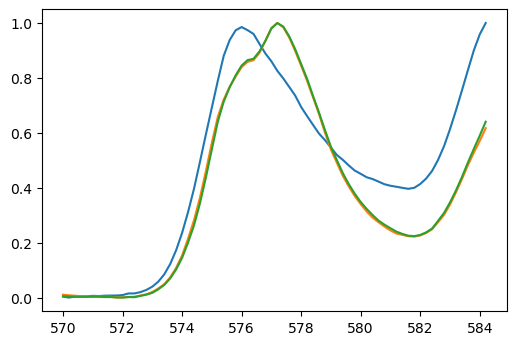

In [6]:
plt.plot(xrange,normalize_array(np.nanmean(gb_0, axis=(1,2))))
plt.plot(xrange,normalize_array(np.nanmean(gb_1, axis=(1,2))))
plt.plot(xrange,normalize_array(np.average(cr_ox1,axis=(1,2))))
# plt.plot(xrange,normalize_array(np.nanmean(gb_2, axis=(1,2))))
# plt.plot(xrange,normalize_array(np.average(cr_ox2,axis=(1,2))))
# plt.legend(["grain boundary", 'alloy surface'])
# print(np.nanmean(gb_2),np.nanmean(cr_ox2))

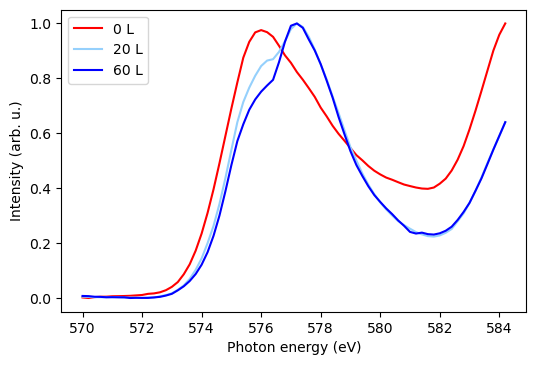

In [7]:
# plt.plot(xrange, normalize_array(np.average(cr_ox_replication,axis=(1,2))))
plt.plot(xrange, normalize_array(np.average(cr_ox0,axis=(1,2))),c='r')
plt.plot(xrange, normalize_array(np.average(cr_ox1,axis=(1,2))), c='xkcd:light blue')
plt.plot(xrange, normalize_array(np.average(cr_ox2,axis=(1,2))), c='b')
plt.xlabel("Photon energy (eV)")
plt.ylabel("Intensity (arb. u.)")
plt.legend(["0 L","20 L", "60 L"])
# plt.plot(xrange, make_ref_arr(metal_ref_interp,xrange, -1.3))
# plt.plot(xrange, make_ref_arr(oxide_ref_interp,xrange, -1.3))



In [8]:

cs_img0 = normed_cs_metal_ox(cr_ox0, make_ref_arr(metal_ref_interp,xrange, -.25), make_ref_arr(oxide_ref_interp,xrange, -.25))
cs_img1 = normed_cs_metal_ox(cr_ox1, metal_ref,oxide_ref)
cs_img2 = normed_cs_metal_ox(cr_ox2, metal_ref, oxide_ref)

/Users/apple/vscode/Research/NiCrMo/xpeem_utils.py:324: RuntimeWarning: invalid value encountered in true_divide
  cosine = np.dot(flat_image,reference)/(norm*np.linalg.norm(reference))


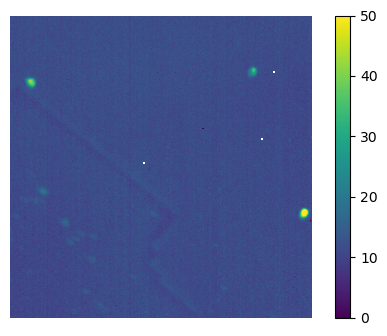

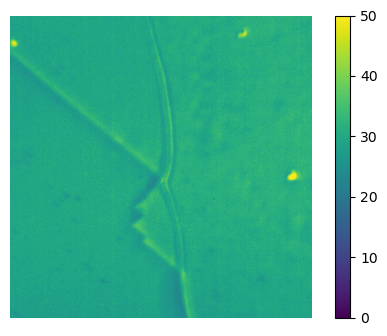

<function matplotlib.pyplot.show(close=None, block=None)>

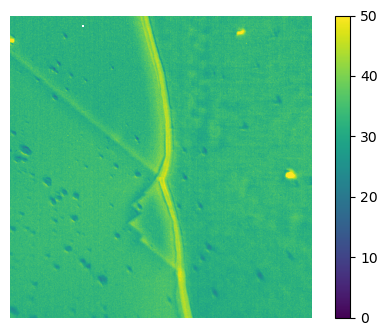

In [9]:
plt.imshow(oxide_cs_to_percent(cs_img0),vmin=0,vmax=50)
plt.axis('off')
plt.colorbar()
plt.show()
plt.imshow(oxide_cs_to_percent(cs_img1),vmin=0,vmax=50)
plt.axis('off')
plt.colorbar()
plt.show()
plt.imshow(oxide_cs_to_percent(cs_img2),vmin=0,vmax=50)
plt.axis('off')
plt.colorbar()
plt.show

In [10]:
print("Mean: ")
print(oxide_cs_to_percent(np.nanmean(cs_img0)), oxide_cs_to_percent(np.nanmean(cs_img1)),oxide_cs_to_percent(np.nanmean(cs_img2)))
print("Median: ")
print(oxide_cs_to_percent(np.nanmedian(cs_img0)), oxide_cs_to_percent(np.nanmedian(cs_img1)),oxide_cs_to_percent(np.nanmedian(cs_img2)))

Mean: 
11.67510231743325 30.18449569510775 33.266054054486816
Median: 
11.636888182083638 30.169619602346565 33.07773698762073


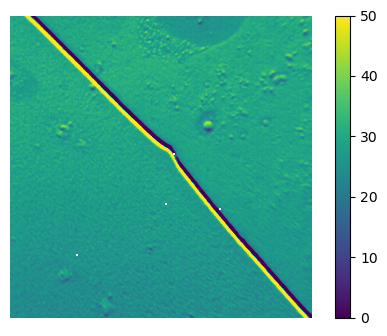

In [11]:
#The repliation we did in 2024 is shifted really far from the reference spectra we have for the oxide and metal 
rep_exclude_mask = imread("/Users/apple/Sync/Research/Mo XPEEM/Masks/Brookhaven experiment 2/replication mask.tif")
cs_img_replication = normed_cs_metal_ox(cr_ox_replication, make_ref_arr(metal_ref_interp,xrange, -1.3), make_ref_arr(oxide_ref_interp,xrange, -1.3))
plt.imshow(oxide_cs_to_percent(cs_img_replication),vmin=0,vmax=50)
plt.axis('off')
plt.colorbar()

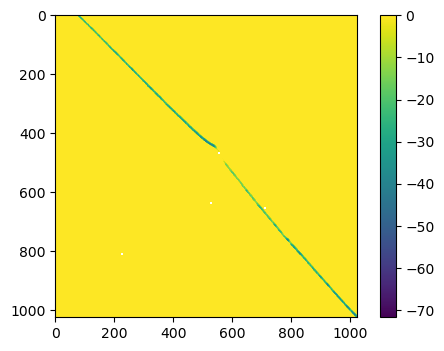

In [22]:
plt.imshow(oxide_cs_to_percent(cs_img_replication),vmax=0)
plt.colorbar()